In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns


In [4]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [6]:
%matplotlib inline 
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

print("All Libraries imported successfully!")

All Libraries imported successfully!


In [7]:
iris = load_iris()

df = pd.DataFrame(
    data = iris.data,
    columns = iris.feature_names
)

df['target'] = iris.target

df['species'] = df['target'].map({
    0: 'setosa',
    1: 'versicolor',  
    2: 'virginica'
 })

print('Dataset loaded successfully!')
print(f'\n Dataset shape: {df.shape}')
print(f'Number of samples: {len(df)}')
print(f'Number of features: {len(iris.feature_names)}')
print(f'\n First 5 rows:')
df.head()

Dataset loaded successfully!

 Dataset shape: (150, 6)
Number of samples: 150
Number of features: 4

 First 5 rows:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [8]:
# What are we trying to predict?
print("PROBLEM STATEMENT:")
print("Predict the species of iris flower based on 4 measurements")
print("Features (Input):")
for i, feature in enumerate(iris.feature_names, 1):
    print(f"  {i}. {feature}")

print("\nTarget (Output):")
print("  Species: setosa, versicolor, or virginica")

print("\n" + "="*50)
print("This is a CLASSIFICATION problem!")
print("="*50)

PROBLEM STATEMENT:
Predict the species of iris flower based on 4 measurements
Features (Input):
  1. sepal length (cm)
  2. sepal width (cm)
  3. petal length (cm)
  4. petal width (cm)

Target (Output):
  Species: setosa, versicolor, or virginica

This is a CLASSIFICATION problem!


In [9]:
print("Dataset Statistics:\n")
print(df.describe())

print('Data types:\n')
print(df.dtypes)

print('\n any missing values')
print(df.isnull().sum())

print('Class Distribution:')
print(df['species'].value_counts())

Dataset Statistics:

       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)      target  
count        150.000000  150.000000  
mean           1.199333    1.000000  
std            0.762238    0.819232  
min            0.100000    0.000000  
25%            0.300000    0.000000  
50%            1.300000    1.000000  
75%            1.800000    2.000000  
max            2.500000    2.000000  
Data types:

sepal length (cm)    float64
sepal wid

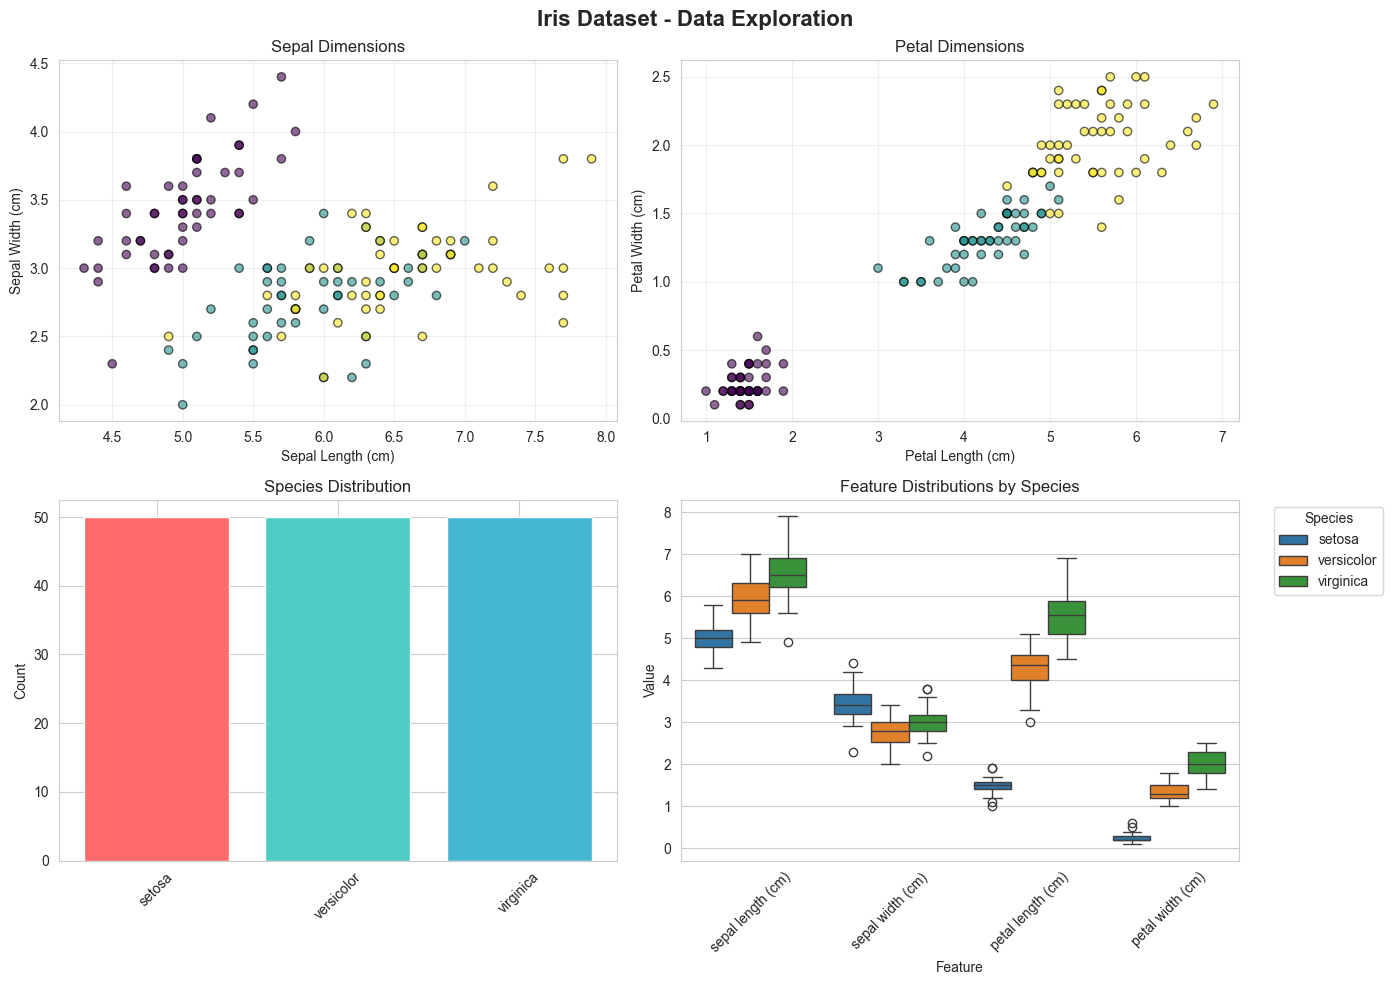

Visualizations complete!


In [10]:
# Create a 2x2 grid of plots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Iris Dataset - Data Exploration', fontsize=16, fontweight='bold')

# Plot 1: Sepal Length vs Width
axes[0, 0].scatter(df['sepal length (cm)'], df['sepal width (cm)'], 
                   c=df['target'], cmap='viridis', alpha=0.6, edgecolors='black')
axes[0, 0].set_xlabel('Sepal Length (cm)')
axes[0, 0].set_ylabel('Sepal Width (cm)')
axes[0, 0].set_title('Sepal Dimensions')
axes[0, 0].grid(True, alpha=0.3)

# Plot 2: Petal Length vs Width
axes[0, 1].scatter(df['petal length (cm)'], df['petal width (cm)'], 
                   c=df['target'], cmap='viridis', alpha=0.6, edgecolors='black')
axes[0, 1].set_xlabel('Petal Length (cm)')
axes[0, 1].set_ylabel('Petal Width (cm)')
axes[0, 1].set_title('Petal Dimensions')
axes[0, 1].grid(True, alpha=0.3)

# Plot 3: Species Distribution
species_counts = df['species'].value_counts()
axes[1, 0].bar(species_counts.index, species_counts.values, 
               color=['#FF6B6B', '#4ECDC4', '#45B7D1'])
axes[1, 0].set_ylabel('Count')
axes[1, 0].set_title('Species Distribution')
axes[1, 0].tick_params(axis='x', rotation=45)

# Plot 4: Box plot of features
df_melted = df.melt(id_vars=['species'], 
                     value_vars=iris.feature_names,
                     var_name='Feature', 
                     value_name='Value')
sns.boxplot(data=df_melted, x='Feature', y='Value', hue='species', ax=axes[1, 1])
axes[1, 1].set_title('Feature Distributions by Species')
axes[1, 1].tick_params(axis='x', rotation=45)
axes[1, 1].legend(title='Species', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

print("Visualizations complete!")